In [165]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline
airports = pd.read_csv(r"C:\Users\Avishaek\Downloads\Sorted Data\UK_FLIGHT_DATA.csv")
names=('id','label','country','LAT','LON')



In [107]:
Flight_Data = pd.read_csv(r"C:\Users\Avishaek\Downloads\Sorted Data\UK_AIRPORT_DATA.csv")
Flight_Data.columns

Index(['id', 'label', 'country', 'Lat ', 'Lon'], dtype='object')

In [131]:

##Merging Parallel Edges and Adding-Up their Respective weights

#airport_us=airport_us.groupby(['Source','Target']).sum('Weight').reset_index()
airport_us= airports[['Source','Target','Weight']]
airport_us.Weight.nunique()

280

In [132]:

routes_us= airport_us[['Source','Target']]
edges = airport_us[['Source','Target']].values


In [166]:
G=nx.from_pandas_edgelist(airport_us, source= 'Source', target='Target', edge_attr='Weight', create_using=nx.DiGraph)

len(G.nodes()), len(G.edges()) # Directed Graph

(60, 358)

In [134]:
Weight= nx.get_edge_attributes(g,'Weight')
Weight

{}

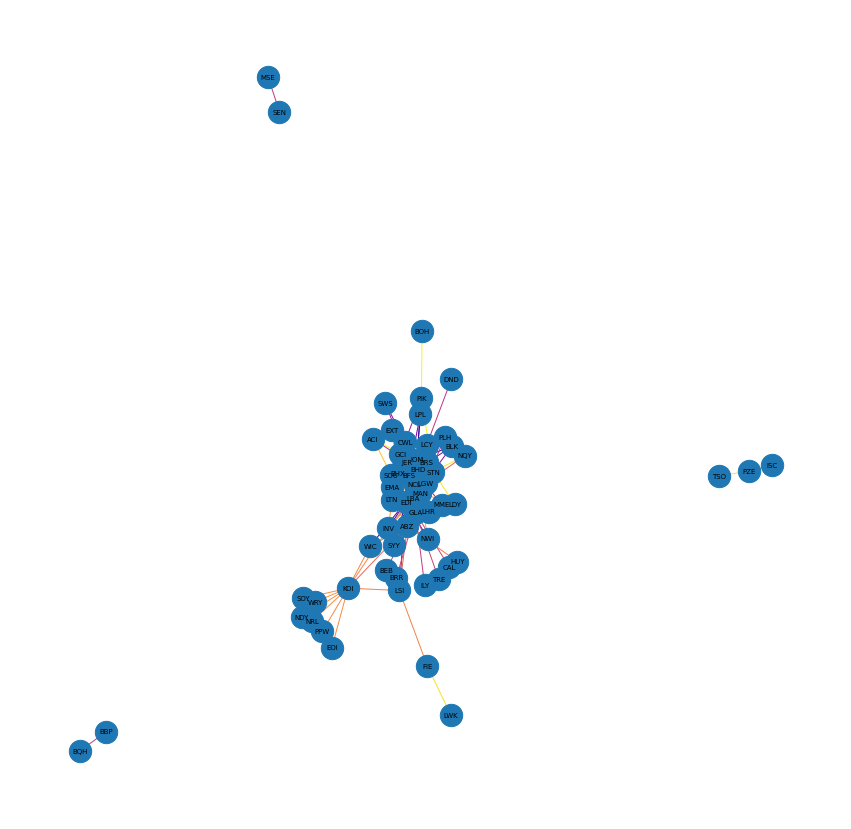

In [135]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

M = g.number_of_edges()
edge_colors = range(2, M + 2)

cmap = plt.cm.plasma

nx.draw_networkx(g, ax=ax, node_size=500, arrowstyle="->", arrowsize=10, edge_color=edge_colors, edge_cmap=cmap,  font_size=7, alpha=1, width=1)
ax.set_axis_off()

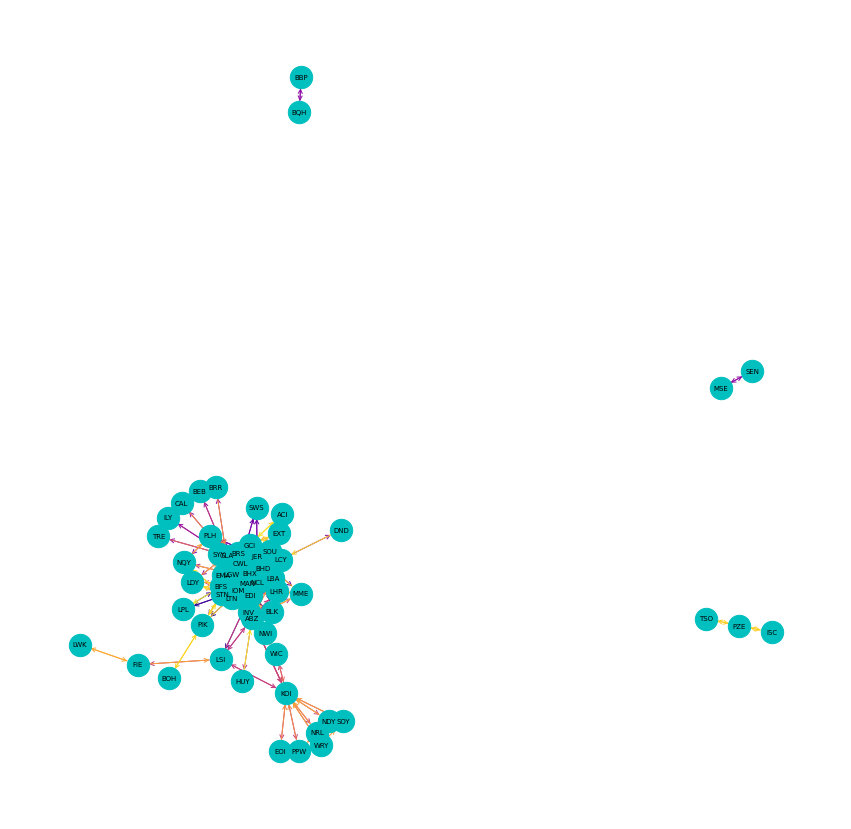

In [136]:

fig, ax = plt.subplots(1, 1, figsize=(15,15))

M = G.number_of_edges()
edge_colors = range(2, M + 2)
cmap = plt.cm.plasma

nx.draw_networkx(G, ax=ax, with_labels= True, node_size=500,  arrowstyle="->", arrowsize=10, edge_color=edge_colors, edge_cmap=cmap, node_color='c', font_size=7, alpha=1, width=1)
ax.set_axis_off()


#### ANALYSIS

In [169]:


deg= nx.degree(G)
deg= sorted(G.degree, key=lambda x: x[1], reverse=True)
deg


[('GLA', 50),
 ('EDI', 42),
 ('JER', 40),
 ('ABZ', 34),
 ('MAN', 32),
 ('IOM', 30),
 ('BHD', 30),
 ('LGW', 26),
 ('BFS', 26),
 ('NCL', 22),
 ('STN', 22),
 ('KOI', 20),
 ('GCI', 20),
 ('BHX', 19),
 ('SOU', 18),
 ('BRS', 18),
 ('CWL', 16),
 ('LHR', 16),
 ('LBA', 16),
 ('EMA', 14),
 ('LCY', 14),
 ('INV', 14),
 ('LTN', 14),
 ('PLH', 8),
 ('LSI', 8),
 ('PIK', 8),
 ('PPW', 7),
 ('EXT', 7),
 ('BLK', 6),
 ('WIC', 6),
 ('SYY', 6),
 ('NRL', 6),
 ('SOY', 6),
 ('LDY', 6),
 ('NDY', 6),
 ('NQY', 6),
 ('MME', 6),
 ('NWI', 6),
 ('ACI', 6),
 ('WRY', 5),
 ('LPL', 4),
 ('SWS', 4),
 ('BEB', 4),
 ('EOI', 4),
 ('BRR', 4),
 ('FIE', 4),
 ('PZE', 4),
 ('BBP', 2),
 ('BQH', 2),
 ('MSE', 2),
 ('SEN', 2),
 ('ILY', 2),
 ('TRE', 2),
 ('CAL', 2),
 ('LWK', 2),
 ('TSO', 2),
 ('ISC', 2),
 ('DND', 2),
 ('BOH', 2),
 ('HUY', 2)]

In [168]:
##Most Influential
most_influential= nx.betweenness_centrality(G)
most_influential
most_influential=dict(sorted(most_influential.items(), reverse=True, key=lambda item: item[1]))
most_influential

{'GLA': 0.192481008743729,
 'ABZ': 0.18743988274706463,
 'KOI': 0.1677246774266061,
 'EDI': 0.0999524953063904,
 'JER': 0.0749690004776042,
 'LSI': 0.06438070177111672,
 'STN': 0.05397307043095919,
 'INV': 0.04587611557219975,
 'IOM': 0.04288136403773254,
 'MAN': 0.03688238219689106,
 'LGW': 0.03677938731515059,
 'LCY': 0.030421759527116305,
 'PIK': 0.030325307602097916,
 'FIE': 0.02980713033313851,
 'BFS': 0.02354069286503739,
 'BHD': 0.021884293571388328,
 'CWL': 0.02118310078195458,
 'GCI': 0.01085867100091585,
 'BHX': 0.010778895206517383,
 'SOU': 0.009533019026049168,
 'NCL': 0.007893678016370156,
 'BRS': 0.006827308427550673,
 'WIC': 0.005935348176727486,
 'LHR': 0.004727495376238802,
 'EMA': 0.004504622852467119,
 'LBA': 0.004252395562947536,
 'LTN': 0.004105305051754431,
 'PLH': 0.0020648818354838225,
 'MME': 0.001173310255331433,
 'NQY': 0.001144554841223456,
 'PPW': 0.0005844535359438924,
 'PZE': 0.0005844535359438924,
 'BLK': 0.00021429962984609392,
 'SYY': 0.000194817845314

In [167]:
for w in sorted(most_influential, key= most_influential.get, reverse=True):
    print(w, most_influential[w])

GLA 0.192481008743729
ABZ 0.18743988274706463
KOI 0.1677246774266061
EDI 0.0999524953063904
JER 0.0749690004776042
LSI 0.06438070177111672
STN 0.05397307043095919
INV 0.04587611557219975
IOM 0.04288136403773254
MAN 0.03688238219689106
LGW 0.03677938731515059
LCY 0.030421759527116305
PIK 0.030325307602097916
FIE 0.02980713033313851
BFS 0.02354069286503739
BHD 0.021884293571388328
CWL 0.02118310078195458
GCI 0.01085867100091585
BHX 0.010778895206517383
SOU 0.009533019026049168
NCL 0.007893678016370156
BRS 0.006827308427550673
WIC 0.005935348176727486
LHR 0.004727495376238802
EMA 0.004504622852467119
LBA 0.004252395562947536
LTN 0.004105305051754431
PLH 0.0020648818354838225
MME 0.001173310255331433
NQY 0.001144554841223456
PPW 0.0005844535359438924
PZE 0.0005844535359438924
BLK 0.00021429962984609392
SYY 0.00019481784531463084
NRL 0.0001461133839859731
SOY 0.0001461133839859731
WRY 0.0001461133839859731
NDY 0.0001461133839859731
NWI 9.74089226573154e-05
EXT 8.349336227769891e-05
LPL 5.84

In [144]:
## MOst Important Connection
most_important_link= nx.eigenvector_centrality(G)
for w in sorted(most_important_link, key= most_important_link.get, reverse=True):
    print(w, most_important_link[w])
    
len(most_important_link)

GLA 0.3214053347826571
EDI 0.2986763105711454
JER 0.28461319024059245
MAN 0.26841020239231134
BHD 0.25676382389771596
IOM 0.23328220203826794
LGW 0.231936430999975
BFS 0.22077598842403423
ABZ 0.21679570421600644
NCL 0.2000281191301619
BHX 0.19461682185570228
BRS 0.17611252371089497
SOU 0.1736842359735109
LBA 0.16821340971981952
STN 0.16359548233042923
LHR 0.1549507507377712
GCI 0.15223079510667017
EMA 0.14979916893789152
LTN 0.14690650267688463
CWL 0.13878261546369022
LCY 0.134981210849914
INV 0.11886627602303669
NWI 0.06796296124281462
LDY 0.06532089046601722
SYY 0.06406714508590568
PLH 0.06350428152281626
EXT 0.06013587946309981
MME 0.056906616344759776
BLK 0.05667077988522746
ACI 0.05293281890080448
LSI 0.04849251416020826
WIC 0.04812521376645362
PIK 0.04679349441828808
NQY 0.039798404674521316
KOI 0.039599546843884406
LPL 0.03936698661669285
SWS 0.03670840181196441
BEB 0.030511299484408175
BRR 0.030511299484408175
ILY 0.027865973436348467
TRE 0.027865973436348467
CAL 0.027865973436

60

In [149]:
best_connector= nx.betweenness_centrality(G)
for w in sorted(best_connector, key= best_connector.get, reverse=True):
    print(w, best_connector[w])

GLA 0.192481008743729
ABZ 0.18743988274706463
KOI 0.1677246774266061
EDI 0.0999524953063904
JER 0.0749690004776042
LSI 0.06438070177111672
STN 0.05397307043095919
INV 0.04587611557219975
IOM 0.04288136403773254
MAN 0.03688238219689106
LGW 0.03677938731515059
LCY 0.030421759527116305
PIK 0.030325307602097916
FIE 0.02980713033313851
BFS 0.02354069286503739
BHD 0.021884293571388328
CWL 0.02118310078195458
GCI 0.01085867100091585
BHX 0.010778895206517383
SOU 0.009533019026049168
NCL 0.007893678016370156
BRS 0.006827308427550673
WIC 0.005935348176727486
LHR 0.004727495376238802
EMA 0.004504622852467119
LBA 0.004252395562947536
LTN 0.004105305051754431
PLH 0.0020648818354838225
MME 0.001173310255331433
NQY 0.001144554841223456
PPW 0.0005844535359438924
PZE 0.0005844535359438924
BLK 0.00021429962984609392
SYY 0.00019481784531463084
NRL 0.0001461133839859731
SOY 0.0001461133839859731
WRY 0.0001461133839859731
NDY 0.0001461133839859731
NWI 9.74089226573154e-05
EXT 8.349336227769891e-05
LPL 5.84

In [372]:
#Building a SubGroup
#Group1= nx.bfs_tree(G,"FAI")
#nx.draw_networkx(Group1,node_size=300, node_color='c', font_size=7, alpha=1, width=.5)

NetworkXError: The node FAI is not in the graph.

{'EMA': 0.42857142857142855,
 'IOM': 0.2857142857142857,
 'EDI': 0.23333333333333334,
 'LPL': 0,
 'BHD': 0.44285714285714284,
 'BLK': 0.3333333333333333,
 'CWL': 0.39285714285714285,
 'JER': 0.27631578947368424,
 'PLH': 0.5,
 'SWS': 1.0,
 'LCY': 0.5238095238095238,
 'BBP': 0,
 'BQH': 0,
 'MSE': 0,
 'SEN': 0,
 'GLA': 0.2,
 'ILY': 0,
 'LGW': 0.3974358974358974,
 'ABZ': 0.20588235294117646,
 'BEB': 1.0,
 'LSI': 0.16666666666666666,
 'KOI': 0.16666666666666666,
 'INV': 0.42857142857142855,
 'LHR': 0.5,
 'MAN': 0.38333333333333336,
 'BHX': 0.48148148148148145,
 'TRE': 0,
 'WIC': 0.3333333333333333,
 'NCL': 0.41818181818181815,
 'SOU': 0.5277777777777778,
 'BRS': 0.4444444444444444,
 'PPW': 0.5555555555555556,
 'CAL': 0,
 'SYY': 0.6666666666666666,
 'EOI': 1.0,
 'LTN': 0.47619047619047616,
 'BRR': 1.0,
 'NRL': 0.7692307692307693,
 'SOY': 0.7692307692307693,
 'WRY': 0.75,
 'FIE': 0,
 'LDY': 1.0,
 'NDY': 0.8333333333333334,
 'NQY': 0.3333333333333333,
 'LWK': 0,
 'LBA': 0.6071428571428571,
 'M

In [150]:
##Association
nx.clustering(G)
nx.degree_assortativity_coefficient(G)

-0.12981793581378992

In [327]:
g= nx_graph.to_undirected()


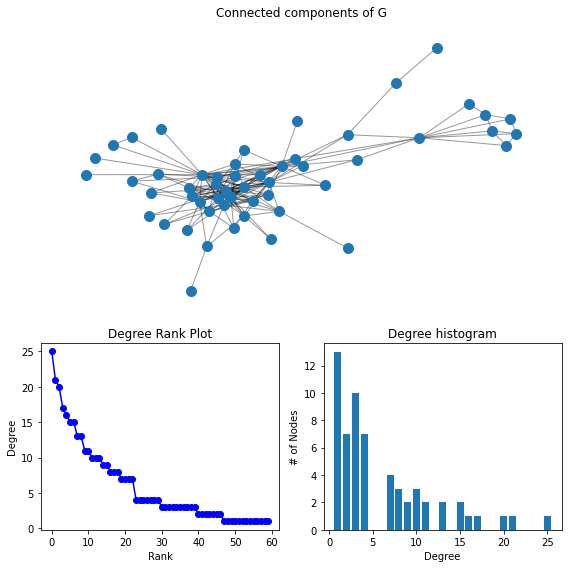

In [151]:
import numpy as np

degree_sequence = sorted((d for n, d in g.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = g.subgraph(sorted(nx.connected_components(g), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=100, alpha=1)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()  # ASSIGNMENT---SO FAR MICRO PARAMETER

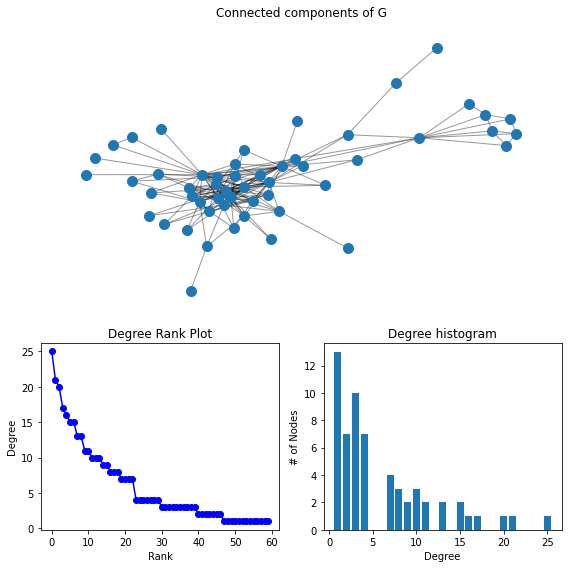

In [152]:
import numpy as np

G= G.to_undirected()
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=100, alpha=1)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()  # ASSIGNMENT---SO FAR MICRO PARAMETER

In [153]:
nx_graph = nx.from_pandas_edgelist(airport_us, source = 'Source', target = 'Target', edge_attr = 'Weight',create_using = nx.DiGraph())

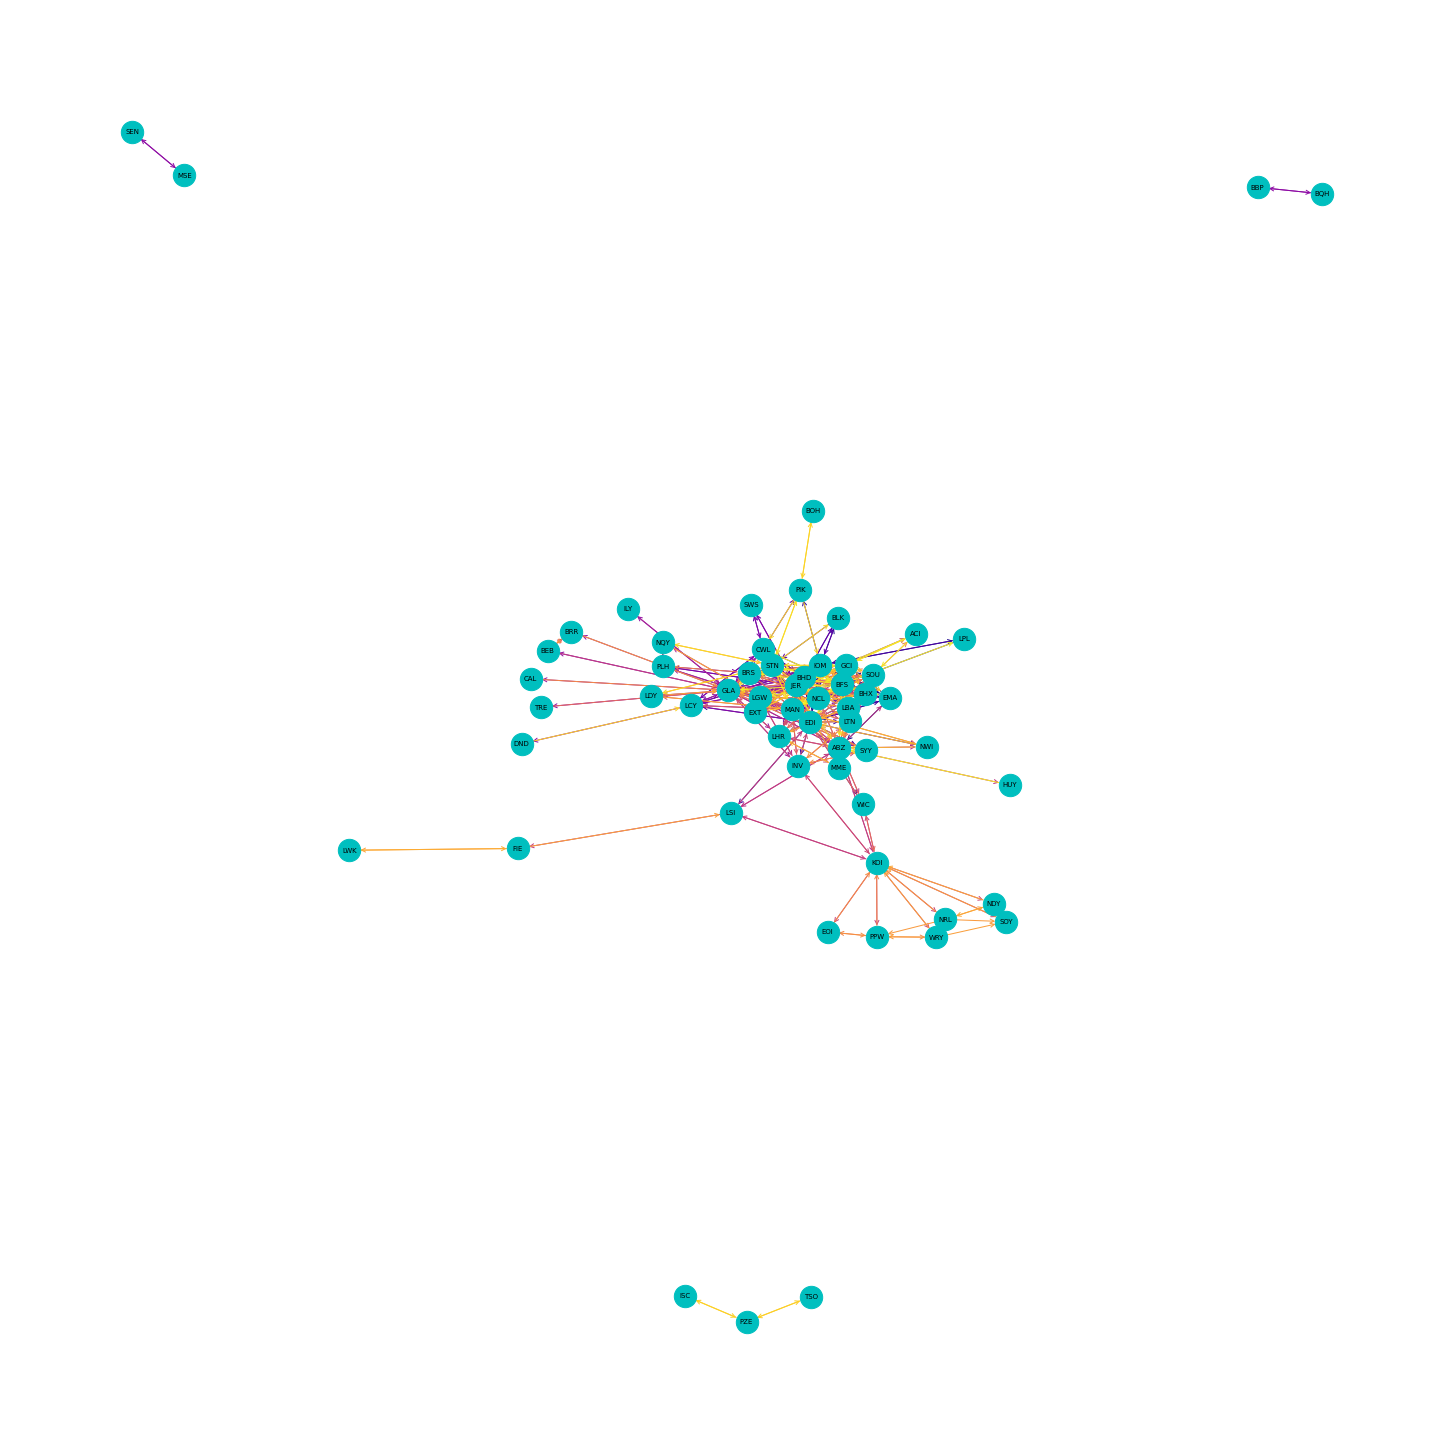

In [154]:
plt.figure(figsize = (20,20))
nx.draw_spring(nx_graph,  with_labels= True, node_size=500,  arrowstyle="->", arrowsize=10, edge_color=edge_colors, edge_cmap=cmap, node_color='c', font_size=7, alpha=1, width=1)
plt.show()

In [155]:
nx_graph= nx_graph.to_undirected()
nx_graph_undirected= nx_graph

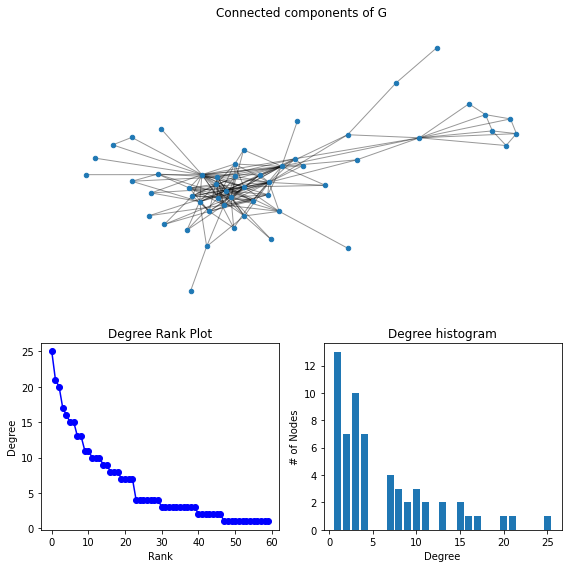

In [156]:
import numpy as np

degree_sequence = sorted((d for n, d in nx_graph_undirected.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = nx_graph_undirected.subgraph(sorted(nx.connected_components(nx_graph_undirected), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()  # ASSIGNMENT---SO FAR MICRO PARAMETER

In [157]:
# largest connected component
components = nx.connected_components(nx_graph_undirected)
largest_component = max(components, key=len)
H = nx_graph_undirected.subgraph(largest_component)

In [160]:
# compute centrality
centrality = nx.betweenness_centrality(nx_graph_undirected, k=2, endpoints=True)

# compute community structure
lpc = nx.community.label_propagation_communities(nx_graph_undirected)
community_index = {n: i for i, com in enumerate(lpc) for n in com}


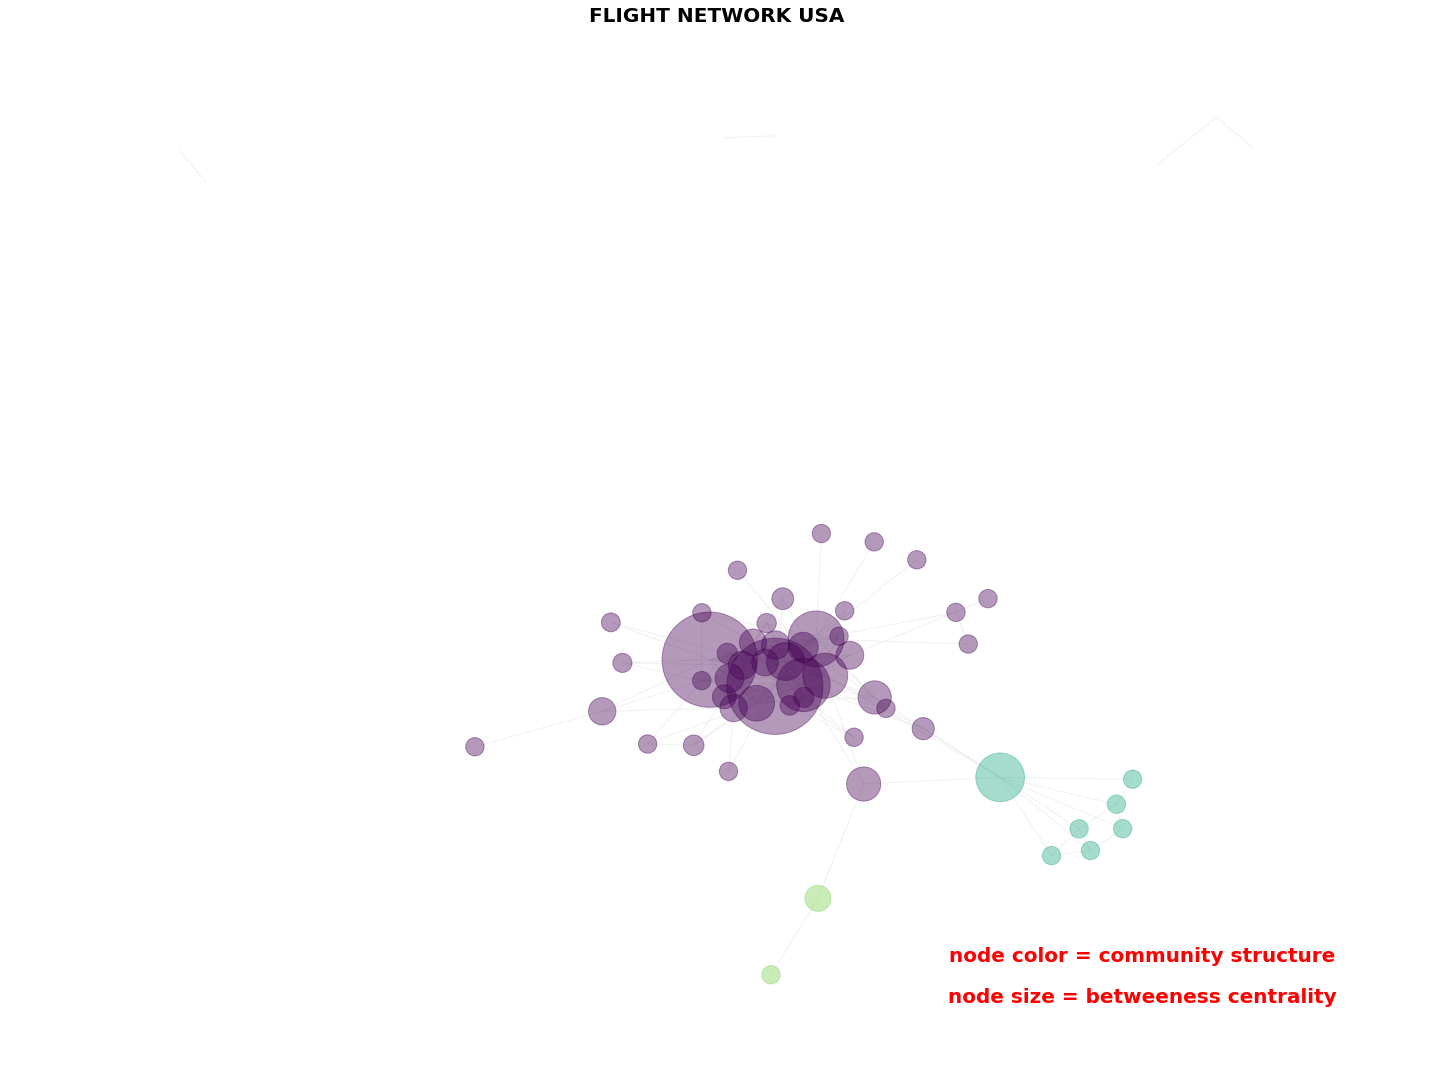

In [161]:
fig, ax = plt.subplots(figsize=(20, 15))
pos = nx.spring_layout(nx_graph_undirected, k=0.15, seed=4572321)
node_color = [community_index[n] for n in nx_graph_undirected]
node_size = [v * 20000 for v in centrality.values()]
nx.draw_networkx(
    nx_graph_undirected,
    pos=pos,
    with_labels=False,
    node_color=node_color,
    node_size=node_size,
    edge_color="gainsboro",
    alpha=0.4,
)

# Title/legend
font = {"color": "k", "fontweight": "bold", "fontsize": 20}
ax.set_title("FLIGHT NETWORK USA", font)
# Change font color for legend
font["color"] = "r"

ax.text(
    0.80,
    0.10,
    "node color = community structure",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)
ax.text(
    0.80,
    0.06,
    "node size = betweeness centrality",
    horizontalalignment="center",
    transform=ax.transAxes,
    fontdict=font,
)

# Resize figure for label readibility
ax.margins(0.1, 0.05)
fig.tight_layout()
plt.axis("off")
plt.show()

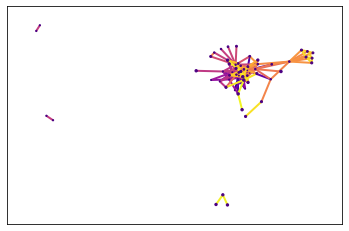

In [162]:
import matplotlib as mpl

import matplotlib.pyplot as plt

pos = nx.spring_layout(nx_graph) # Spring layout
#pos = nx.shell_layout(nx_graph)
#pos = nx.random_layout(nx_graph)
node_sizes = [.3 + .10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.plasma

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
)


# 